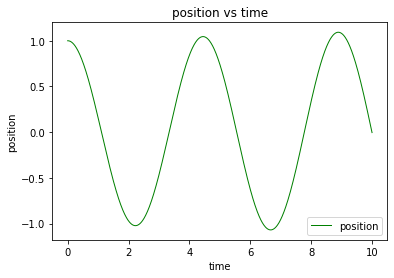

In [3]:
# let's define parameter 

import numpy as np
import matplotlib.pyplot as plt

roll_number = 2020101055
k = roll_number % 3 + 1             # 2
m = roll_number % 5 + 1             # 1
x_0 = roll_number % 7 + 1           # 1 

n = int(input("enter number of steps for differentiation , like 1000000: ")) # parts to divide in
observation_time = int(input("enter observation time, like 10 sec: "))
t_axis = np.linspace(0,observation_time,n)
x_axis = np.zeros(n)
p_axis = np.zeros(n)

d_t = t_axis[1] - t_axis[0]         # delta(t)
w_square = k / m                     # standard w^2 in shm motion


# basically now we are going to solve linear alegbra problem made by using finite difference mehtod on 
# row vector [x , velocity] ,( which follows as given in pdf ), r_i+1 = r_i * (M * d_t + I) 

R = np.zeros(2*n).reshape(n,2)           # made the row vector ( x , velocity )
R[0,:] = [x_0,0]                         # init the R , extreme position x = x_0 and velocity = 0

M = np.array([ [0,-w_square],[1,0] ])    
I = np.eye(2)

M_ = (M * d_t) + I

for i in range(n-1):
    R[i+1,:] = R[i,:].dot(M_) 
    
for i in range(n):
    x_axis[i] = R[i,0]
    p_axis[i] = R[i,1] * m
    
plt.plot(t_axis,x_axis,'g',label="position",linewidth=1)
plt.title("position vs time")
plt.xlabel("time")
plt.ylabel("position")
plt.legend()
plt.show()